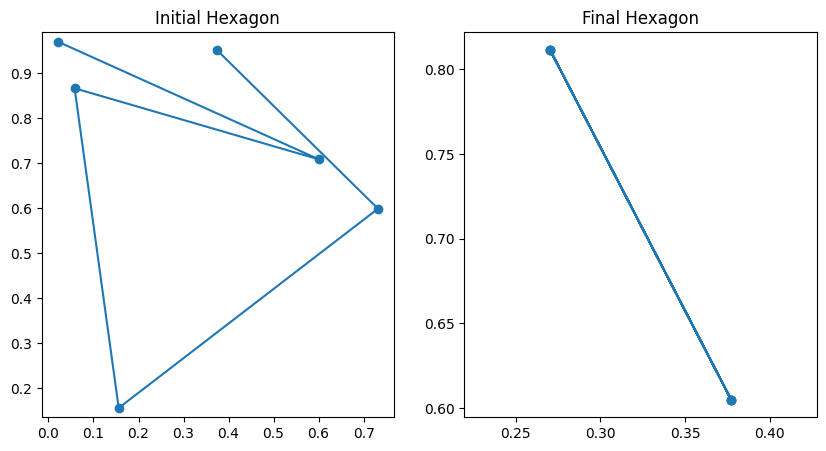

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
num_points = 6
points = np.random.rand(num_points, 2)


def update_points(points):
    new_points = np.zeros_like(points)
    for i in range(len(points)):
        new_points[i] = (points[i - 1] + points[(i + 1) % len(points)]) / 2
    return new_points


iterations = 50
all_points = [points.copy()]
for _ in range(iterations):
    points = update_points(points)
    all_points.append(points.copy())

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(all_points[0][:, 0], all_points[0][:, 1], "o-", label="Initial")
plt.title("Initial Hexagon")
plt.axis("equal")

plt.subplot(1, 2, 2)
plt.plot(all_points[-1][:, 0], all_points[-1][:, 1], "o-", label="Final")
plt.title("Final Hexagon")
plt.axis("equal")

plt.show()

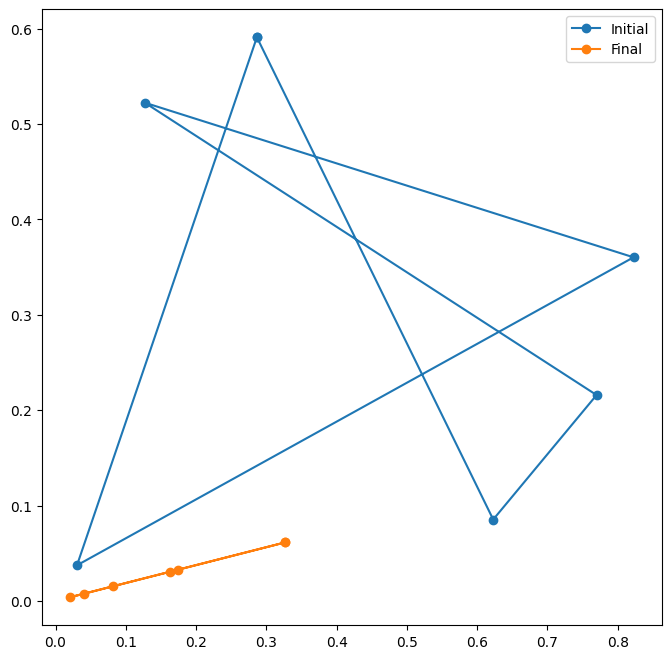

In [25]:
import numpy as np
import matplotlib.pyplot as plt

num_points = 6
points = np.random.rand(num_points, 2)
history = [points.copy()]
num_iterations = 50


for i in range(num_iterations):
    new_points = np.zeros_like(points)

for n in range(
    num_points
):  # モジュロ演算を利用して隣接する点のインデックスを求める
    prev_index = (n - 1) % num_points
    next_index = (n + 1) % num_points
    new_points[n] = (points[prev_index] + points[next_index]) / 2
    points = new_points
    history.append(points.copy())

plt.figure(figsize=(8, 8))
history = np.array(history)  # shape: (num_iterations+1, 6, 2)


def get_closed_polygon(poly):
    return np.vstack([poly, poly[0]])


initial_poly = get_closed_polygon(history[0])
plt.plot(initial_poly[:, 0], initial_poly[:, 1], "o-", label="Initial")
final_poly = get_closed_polygon(history[-1])
plt.plot(final_poly[:, 0], final_poly[:, 1], "o-", label="Final")
plt.legend()
plt.show()



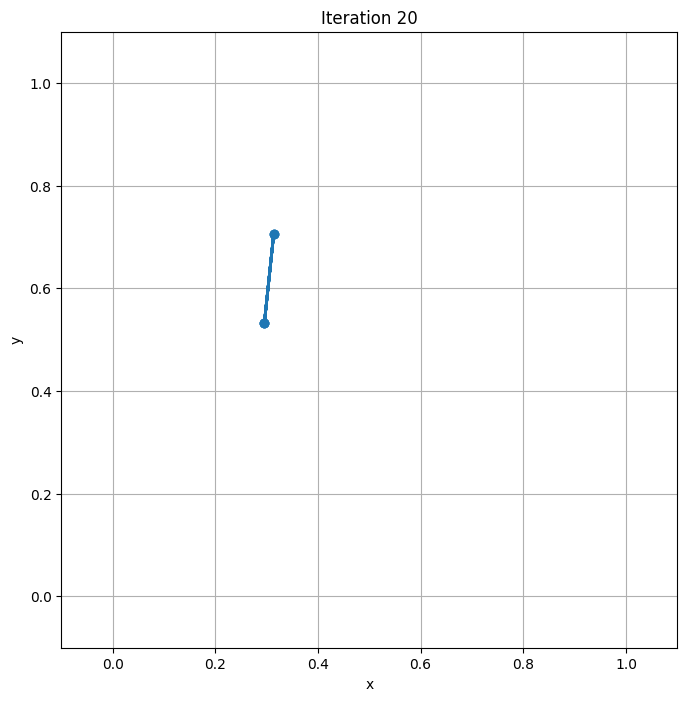

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 点の個数と初期配置
num_points = 6
points = np.random.rand(num_points, 2)
history = [points.copy()]

# シミュレーション回数
num_iterations = 20
for i in range(num_iterations):
    new_points = np.zeros_like(points)
    for n in range(num_points):
        # 隣接する点のインデックス（モジュロ演算）
        prev_index = (n - 1) % num_points
        next_index = (n + 1) % num_points
        new_points[n] = (points[prev_index] + points[next_index]) / 2
    points = new_points
    history.append(points.copy())

history = np.array(history)  # shape: (num_iterations+1, 6, 2)


# 閉じた多角形にするための補助関数
def get_closed_polygon(poly):
    return np.vstack([poly, poly[0]])


# 描画設定
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_aspect("equal")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True)

# 初期状態の多角形（空）を描画するラインオブジェクトを用意
(line,) = ax.plot([], [], "o-", lw=2)


# イニシャライズ関数
def init():
    line.set_data([], [])
    return (line,)


# フレームごとに呼び出される更新関数
def animate(i):
    poly = get_closed_polygon(history[i])
    line.set_data(poly[:, 0], poly[:, 1])
    ax.set_title(f"Iteration {i}")
    return (line,)


# アニメーションの作成
ani = animation.FuncAnimation(
    fig,
    animate,
    frames=len(history),
    init_func=init,
    blit=True,
    interval=200,
    repeat=False,
)

# (オプション) MP4動画として保存する場合（ffmpegが必要です）
ani.save('iteration_animation.mp4', writer='ffmpeg')

plt.show()

/var/folders/r6/9wmw6_hn1nzcx1sg37vf_1jm0000gn/T/ipykernel_96838/1710030717.py:69: UserWarning: Glyph 22855 (\N{CJK UNIFIED IDEOGRAPH-5947}) missing from current font.
  ani = animation.FuncAnimation(
/var/folders/r6/9wmw6_hn1nzcx1sg37vf_1jm0000gn/T/ipykernel_96838/1710030717.py:69: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  ani = animation.FuncAnimation(
/var/folders/r6/9wmw6_hn1nzcx1sg37vf_1jm0000gn/T/ipykernel_96838/1710030717.py:69: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  ani = animation.FuncAnimation(
/var/folders/r6/9wmw6_hn1nzcx1sg37vf_1jm0000gn/T/ipykernel_96838/1710030717.py:69: UserWarning: Glyph 20598 (\N{CJK UNIFIED IDEOGRAPH-5076}) missing from current font.
  ani = animation.FuncAnimation(
/var/folders/r6/9wmw6_hn1nzcx1sg37vf_1jm0000gn/T/ipykernel_96838/1710030717.py:69: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  ani = animation.FuncAnimation(
/var/folde

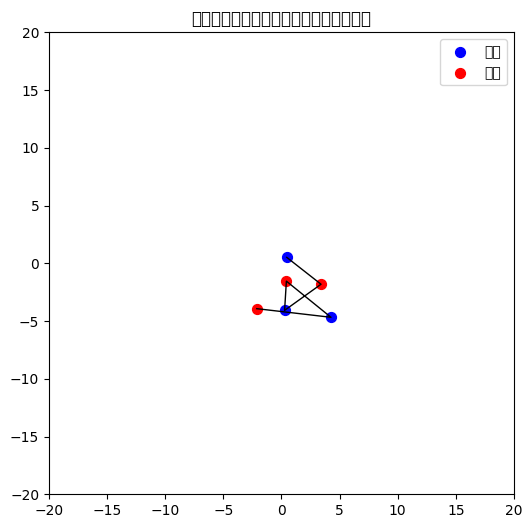

In [39]:
"""
matplotlib の animation を利用して、
軌跡上の点群を描画し、奇数番目・偶数番目の点の色を分けて表示するサンプルコード

※ ffmpeg が必要な場合は、適宜インストールしてください。
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# アニメーションに使うデータの生成例
# ここでは、各フレームで少しずつ変化するランダムな2次元点列を生成しています。
num_frames = 50  # フレーム数
num_points = 6  # 各フレームでの点の数
history = []  # 各フレームの点列（2次元座標の配列）を保存

# 初期位置（0,0）から各フレームでランダムウォークする例
current_points = np.zeros((num_points, 2))
for i in range(num_frames):
    # 各点にランダムな変位を加える
    delta = np.random.randn(num_points, 2) * 0.5
    current_points = current_points + delta
    history.append(current_points.copy())

# 描画の設定
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_title("奇数・偶数の点の色分けアニメーション")

# 軌跡を結ぶ線（薄い黒色）
(line,) = ax.plot([], [], lw=1, color="black")

# 奇数番目（赤）、偶数番目（青）の点
scatter_even = ax.scatter([], [], c="blue", s=50, label="偶数")
scatter_odd = ax.scatter([], [], c="red", s=50, label="奇数")
ax.legend()


# 初期化関数
def init():
    line.set_data([], [])
    # set_offsets() に渡す初期データは 2次元配列 (0,2) にする
    scatter_even.set_offsets(np.empty((0, 2)))
    scatter_odd.set_offsets(np.empty((0, 2)))
    return line, scatter_even, scatter_odd


# 各フレームごとの更新関数
def animate(i):
    # 現在のフレームの点の座標を取得
    points = history[i]  # shape: (num_points, 2)
    # 軌跡全体を線でつなぐ（ここではフレーム i のすべての点を結んでいます）
    line.set_data(points[:, 0], points[:, 1])

    # 偶数番目と奇数番目で点を分ける
    # Pythonのインデックスは0からなので、0番目（偶数）→ blue, 1番目（奇数）→ red
    points_even = points[0::2]
    points_odd = points[1::2]

    scatter_even.set_offsets(points_even)
    scatter_odd.set_offsets(points_odd)

    return line, scatter_even, scatter_odd


# アニメーションの作成
ani = animation.FuncAnimation(
    fig,
    animate,
    frames=len(history),
    init_func=init,
    blit=True,
    interval=200,
    repeat=False,
)

# アニメーションの保存（MP4として保存する場合は ffmpeg がインストールされている必要があります）
ani.save("animation_odd_even.mp4", writer="ffmpeg")

# または、インタラクティブなウィンドウで表示する場合は以下：
plt.show()